In [1]:
from pytrends.request import TrendReq
import pycountry
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import pandas as pd
import plotly.graph_objects as go

In [38]:
#!pip install pycountry

In [71]:
#create object 
pytrends = TrendReq(hl='en-US')

#define paramenters 
keywords = ['Python','R','C++','Java', 'Javas script']

In [78]:
#pytrends.build_payload(keywords, timeframe = 'today 5-y')
pytrends.build_payload(keywords, timeframe = '2000-01-01 2021-01-01')

data =  pytrends.interest_over_time()
data = data[keywords]
data_rolling = data[keywords].rolling(2).mean()

data_z = stats.zscore(data, axis=0).rolling(52).mean()

In [61]:
type(data)

pandas.core.frame.DataFrame

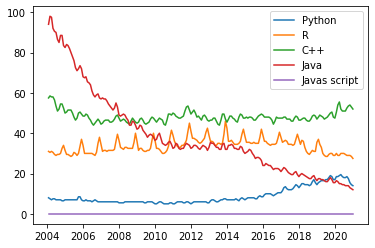

In [79]:
plt.plot(data_rolling)
plt.legend(keywords, loc='best')
plt.show()

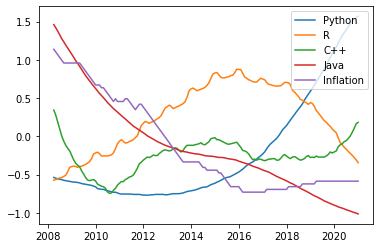

In [70]:
plt.plot(data_z)
plt.legend(keywords, loc='best')
plt.show()

In [64]:
pytrend = TrendReq()
#provide your search terms
kw_list=['inflation']
#get interest by region for your search terms
pytrend.build_payload(kw_list=kw_list)
df = pytrend.interest_by_region()
df.head(10)

,inflation
geoName,
Afghanistan,0
Albania,0
Algeria,0
American Samoa,0
Andorra,0
Angola,0
Anguilla,0
Antarctica,0
Antigua & Barbuda,0


In [66]:
df.shape

(250, 1)

# OCDE GDP NOW CAST BASED ON  GOOGLE TRENDS

In [2]:
gdp_data_weekly =  pd.read_csv('https://raw.githubusercontent.com/NicolasWoloszko/OECD-Weekly-Tracker/main/Data/weekly_tracker.csv')

In [9]:
gdp_m = pd.read_excel('https://github.com/NicolasWoloszko/OECD-Weekly-Tracker/blob/main/Data/monthly_tracker_yo2y.xlsx?raw=true')
gdp_m

lst_countries = gdp_m.country.unique()
lst_countries

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil',
       'Bulgaria', 'Canada', 'Chile', 'Colombia', 'Costa Rica',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Korea', 'Latvia',
       'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand',
       'Norway', 'Poland', 'Portugal', 'Romania', 'Russia',
       'Slovak Republic', 'Slovenia', 'South Africa', 'Spain', 'Sweden',
       'Switzerland', 'Turkey', 'United Kingdom', 'United States'],
      dtype=object)

In [10]:
def country_plot(df,df2, country):
    ''' See recent trends for a giving country and make a plot '''
    
    #subseting df1 weekly
    df = df[df.region==f'{country}'].dropna().set_index('date')
    df = df[['Tracker (counterfactual)', 'Low (counterfactual)','High (counterfactual)']]
    df['Pre covid Trend'] = 0
    #subseting df2 monthly
    
    fig = weekly_plot(df,df2, country)
    return df, fig



# df[['Tracker (counterfactual)', 'Low (counterfactual)','High (counterfactual)']]

# df['Expected pre covid Trend'] = 0

In [6]:

def weekly_plot(df, df2,produto):
    #plotly plot section
    p1_fig = go.Figure()
    colors = ['#E0D253', '#0A3254', '#B2292E','#7AADD4','#336094']
    indice = ['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez']
    config = dict({'scrollZoom': True,'displayModeBar': False})
    
    p1_fig.add_trace(go.Scatter(x=df.index, y=df['High (counterfactual)'],
                                   name='High (counterfactual)',
                                   fill=None,
                                   mode=None,
                                   line_color='lightgray', showlegend=False
                                   ))

    p1_fig.add_trace(go.Scatter(x=df.index, y=df['Low (counterfactual)'], name='Min',
                                   fill='tonexty',  # fill area between trace0 and trace1
                                   mode=None, line_color='lightgray', showlegend=False))

    p1_fig.add_trace(go.Scatter(x=df.index, y=df['Pre covid Trend'], name='Pre covid Trend',
                                   line=dict(color='black', width=4, dash='dot')))
    p1_fig.add_trace(go.Scatter(
                x=df.index, y=df['Tracker (counterfactual)'], line=dict(color=colors[1], width=4), name='Tracker (counterfactual)'))
    
   
    p1_fig.update_layout(title={ 'text': '<b>'+ 'Tracking GDP growth in real time for ' + produto.title()+'<b>','y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
                            paper_bgcolor='rgba(0,0,0,0)', #added the backround collor to the plot 
                            plot_bgcolor='rgba(0,0,0,0)',
                             title_font_size=14,
                             yaxis_title='level compared with pre-covid trend', 
                             template='plotly_white',
                             font_family="Verdana",
                             images=[dict(source='https://raw.githubusercontent.com/caiquecober/Research/master/LOGO_STONEX.png',
                                 xref="paper", yref="paper",
                                 x=0.5, y=0.5,
                                 sizex=0.55, sizey=0.55,
                                 opacity=0.2,
                                 xanchor="center",
                                 yanchor="middle",
                                 sizing="contain",
                                 visible=True,
                                 layer="below")],
                             legend=dict(
                                 orientation="h",
                                 yanchor="bottom",
                                 y=-0.4,
                                 xanchor="center",
                                 x=0.5,
                                 font_family='Verdana'),
                                 autosize=False, height= 550, width=750
                                 )
    return p1_fig

In [17]:
df, fig = country_plot(gdp_data_weekly, gdp_m, 'Brazil')
fig

,Tracker (counterfactual),Low (counterfactual),High (counterfactual),Pre covid Trend
date,,,,
2020-01-05,0.653629,-1.629041,2.993550,0
2020-01-12,0.549217,-1.910186,3.504727,0
2020-01-19,0.449774,-1.781192,3.010965,0
2020-01-26,-0.991088,-3.503323,1.984444,0
2020-02-02,0.102576,-2.338423,2.820441,0
...,...,...,...,...
2021-11-14,2.145836,-2.327938,6.824565,0
2021-11-21,0.719701,-3.104012,5.177482,0
2021-11-28,0.391559,-3.967485,4.769339,0
